# Pharmaceutical Product Reviews Analysis

Pharmaceutical companies spend millions on research and development of new medications while spending millions more on marketing. With the advent of online shopping and online consumer reviews, users of these medications are able to compare notes, provide recommendations, and share their experiences with certain medications. In today's world, which is more connected than ever, more individuals are given a voice and word-of-mouth seems to be the most influencial marketing force driving the choices of the consumer. As pharmaceutical companies struggle to remain competitive amongst each other, it is becoming increasingly important for them to connect with their consumer base and take advantages of the reviews that users leave about their product. Many such reviews remain undisturbed; gold mines of information and insight waiting to be excavated. As Natural Language Processing (NLP) becomes an increasingly accessable tool for the discovery of insights and information from textual data, consumer reviews, similarly, are becoming more valuable sources of data. It is important for companies to explore such textual data if they seek to remain competitive in an ever growing data-fueled economy. 

The goal of this analysis is to utilize NLP techniques to explore patient reviews on specific drugs originally posted on www.drugs.com. The data was originally collected by Surya Kallumadi of Kansas State University and Felix Gräßer of the Institut für Biomedizinische Technik, Technische Universität Dresden in Dresden, Germany. The data can be obtained from the [University of California Irvine Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Drug+Review+Dataset+%28Drugs.com%29).  The data collected includes the drug's name, the review of the drug, the overall rating provided by the reviewer, and other metadata about the review. The main goals of this analysis are to:
 
 - Determine which conditions have the 'best' and 'worst' medications; find opportunities to improve medications targeting specific conditions.
 - Determine if there are any common qualities among the brand names of the drugs that have the highest ratings; improve marketing, breaking down syntax and structure.
 - Determine the gripes that individuals have with their medications; the side-effects they cause in users.
 - Find common qualities among the 'most useful' reviews; determine what characteristics of reviews sway the opinion of undecided consumers. 
 
Click on a link below to jump to a particular step in the project: 

 * [Data Processing & Exploration](#Data-Processing-&-Exploration)
  
 * [Sentiment Analysis of Drug Types](#Sentiment-Analysis-of-Drug-Types)
  
 * [Drug Name Analysis](#Drug-Name-Analysis)
 
     * [Beginning Letter Analysis](#Beginning-Letter-Analysis)
     
     * [Word Count Analysis](#Word-Count-Analysis)
     
     * [Syllable Analysis](#Syllable-Analysis)
   
 * [Drug Review Analysis](#Drug-Review-Analysis)
 
     * [Data Cleaning](#Data-Cleaning)
     
     * [Results](#Results)
   
 * [Conclusions](#Conclusions)
 
*Data Citation*: Felix Gräßer, Surya Kallumadi, Hagen Malberg, and Sebastian Zaunseder. 2018. Aspect-Based Sentiment Analysis of Drug Reviews Applying Cross-Domain and Cross-Data Learning. In Proceedings of the 2018 International Conference on Digital Health (DH '18). ACM, New York, NY, USA, 121-125. DOI: [Web Link](https://dl.acm.org/citation.cfm?doid=3194658.3194677)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import warnings
from IPython.core.interactiveshell import InteractiveShell
import re
import string
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
%matplotlib inline

warnings.filterwarnings('ignore')

In [2]:
# Reading in the data

train = pd.read_csv('drugsComTrain_raw.tsv', sep='\t',  lineterminator='\n', names=None) 
test = pd.read_csv('drugsComTest_raw.tsv', sep='\t',  lineterminator='\n', names=None)
data = pd.concat([train, test]).reset_index(drop = True)

##  Data Processing & Exploration

In [3]:
data.head()

Unnamed: 0                  drugName                     condition  \
0      206461                 Valsartan  Left Ventricular Dysfunction   
1       95260                Guanfacine                          ADHD   
2       92703                    Lybrel                 Birth Control   
3      138000                Ortho Evra                 Birth Control   
4       35696  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating  \
0  "It has no side effect, I take it in combinati...     9.0   
1  "My son is halfway through his fourth week of ...     8.0   
2  "I used to take another oral contraceptive, wh...     5.0   
3  "This is my first time using any form of birth...     8.0   
4  "Suboxone has completely turned my life around...     9.0   

                date  usefulCount\r  
0       May 20, 2012             27  
1     April 27, 2010            192  
2  December 14, 2009             17  
3   November 3, 2015             10  
4  November 27, 2016             37

In [4]:
data.tail()

Unnamed: 0        drugName                  condition  \
215058      159999       Tamoxifen  Breast Cancer, Prevention   
215059      140714    Escitalopram                    Anxiety   
215060      130945  Levonorgestrel              Birth Control   
215061       47656      Tapentadol                       Pain   
215062      113712       Arthrotec                   Sciatica   

                                                   review  rating  \
215058  "I have taken Tamoxifen for 5 years. Side effe...    10.0   
215059  "I&#039;ve been taking Lexapro (escitaploprgra...     9.0   
215060  "I&#039;m married, 34 years old and I have no ...     8.0   
215061  "I was prescribed Nucynta for severe neck/shou...     1.0   
215062                                      "It works!!!"     9.0   

                      date  usefulCount\r  
215058  September 13, 2014             43  
215059     October 8, 2016             11  
215060   November 15, 2010              7  
215061   November 28, 2011             20  
215062  September 13, 2009             46

Below is a glossary of each feature and its meaning:
   * "Unnamed:0" - review id
   * "drugName" - name of the drug being reviewed
   * "condition" - the condition for which the drug is intended to treat
   * "review" - the full text of the review
   * "rating" - the overall rating given to the drug by the reviewer
   * "date" - the date that the reiew was posted
   * "usefulCount" - the number of users that found the review to be helpful

In [5]:
data.shape

(215063, 7)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215063 entries, 0 to 215062
Data columns (total 7 columns):
Unnamed: 0      215063 non-null int64
drugName        215063 non-null object
condition       213869 non-null object
review          215063 non-null object
rating          215063 non-null float64
date            215063 non-null object
    215063 non-null int64
dtypes: float64(1), int64(2), object(4)
memory usage: 11.5+ MB


In [7]:
data.columns

Index(['Unnamed: 0', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount\r'],
      dtype='object')

In [8]:
# Dropping the 'Unnamed:0' column

data = data.drop(['Unnamed: 0'], axis=1)

# Turning the 'date' column into a date datatype 

data['date'] =  pd.to_datetime(data['date'])

# Renaming 'usefulCount\r' to 'usefulCount'

data = data.rename({'usefulCount\r':'usefulCount'}, axis=1)

In [9]:
data.iloc[:,3:6].describe()

rating    usefulCount
count  215063.000000  215063.000000
mean        6.990008      28.001004
std         3.275554      36.346069
min         1.000000       0.000000
25%         5.000000       6.000000
50%         8.000000      16.000000
75%        10.000000      36.000000
max        10.000000    1291.000000

In [10]:
# Determining the range of the dates on which the reviews were posted
print(data['date'].min())
print(data['date'].max())

2008-02-24 00:00:00
2017-12-12 00:00:00


In [11]:
# Function to create a histogram
sns.set(font_scale = 1.5)
def make_histogram(val_counts, title = '', xlab = '', ylab = '', x_rotate = 'horizontal', color = 'dodgerblue'):
    plt.figure(figsize=(12,8))
    sns.barplot(val_counts.index, val_counts.values, alpha=0.5, color= color)
    plt.title(title, fontsize=20)
    plt.xlabel(xlab, fontsize=20)
    plt.ylabel(ylab, fontsize=20)
    plt.xticks(rotation = x_rotate)
    plt.show();

#### Plot 1.1

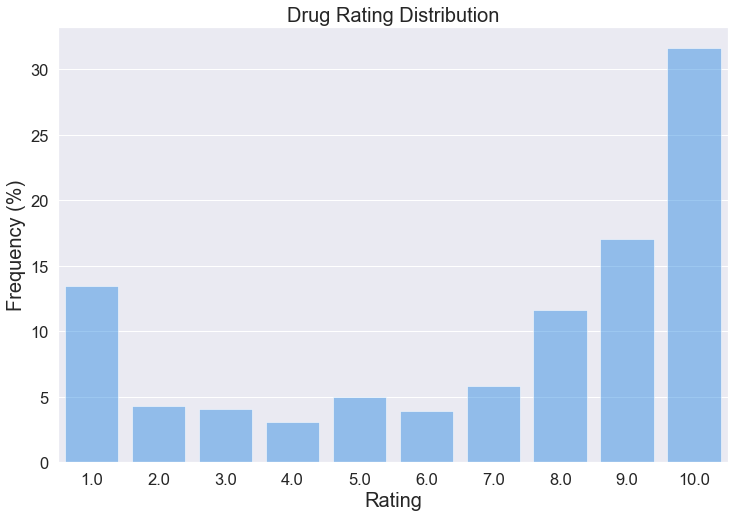

In [12]:
rating_counts = (data['rating'].value_counts(normalize=True)*100)
make_histogram(rating_counts, 'Drug Rating Distribution', 'Rating', 'Frequency (%)')

Evidently, a majority of the drug ratings are 8 or higher.

#### Plot 1.2

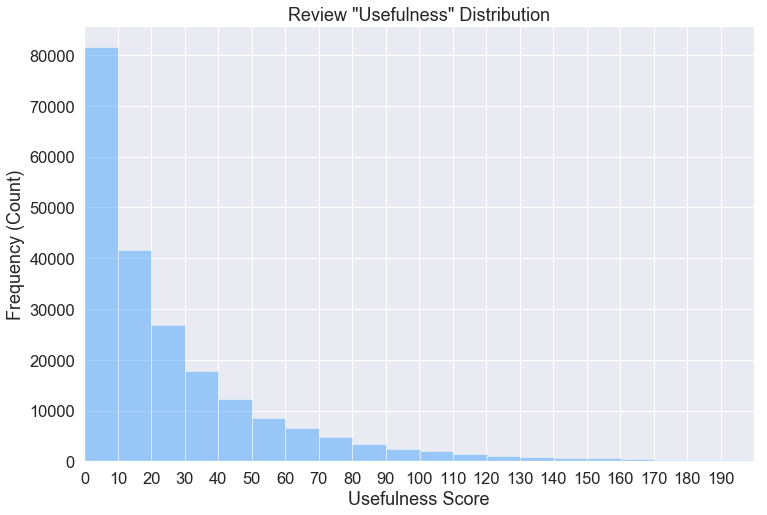

In [13]:
plt.figure(figsize=(12,8))
d = sns.distplot(data[['usefulCount']], color = 'dodgerblue', kde = False, bins = 129)
plt.xlim(0,200)
d.set(xticks=list(range(0,200,10)))
plt.title('Review "Usefulness" Distribution')
plt.xlabel('Usefulness Score')
plt.ylabel('Frequency (Count)');

In [14]:
# What percentage of the reviews have helpfulness ratings lower than 10?

print("% of reviews with 'usefulCount' < 10: ", ((len(data.loc[data['usefulCount'] < 10,])/len(data))*100))

% of reviews with 'usefulCount' < 10:  35.344061972538285


Looks like about a third of the reviews possess 'usefulness' scores of less than 10. Arbitrarily, 'usefulness' scores of, say, 100 or greater can be seen as significant. Important imformation may be gleaned from reviews with particularly high 'usefulness' scores.

Now, let's explore which conditions have the 'best' and 'worst' medications. we'll seperate out medications which have recieved overall ratings lower than 7.0. We will then analyze the conditions that make up this drug population.

## Sentiment Analysis of Drug Types

In [15]:
# 'Negative' reviews

neg_reviews = data.loc[data['rating'] < 7,]
neg_reviews_rec = neg_reviews.loc[neg_reviews['date'] > pd.to_datetime('2015-01-01'),]

# 'Positive' reviews

pos_reviews = data.loc[data['rating'] >= 7,]
pos_reviews_rec = pos_reviews.loc[pos_reviews['date'] > pd.to_datetime('2015-01-01'),]

In [16]:
def horizontal_barplot(x, x_label, y_label, title, bar_labels = '', fig_size = (15, 5), bar_label_size = 'medium',
                      whole = neg_reviews):
    ax = x.plot(kind='barh', figsize=fig_size, color='#1E90FF', zorder=2, width=0.85 , alpha = 0.5)

  # Despine
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)

  # Switch off ticks
    ax.tick_params(axis="both", which="both", bottom="on", top="off", labelbottom="on", left="off", right="off", 
                   labelleft="on", labelsize="large")

  # Set x-axis label
    ax.set_xlabel(x_label, labelpad=20, weight='bold', size=20)
  
  # Set x-axis limit          
    plt.xlim([0,20000])

  # Set y-axis label
    ax.set_ylabel(y_label, labelpad=20, weight='bold', size=20)
    
  # Set title label
    ax.set_title(title, weight='bold', size=20)
    
  # Set tick label size
    ax.tick_params(labelsize=15)
    
  # Adding labels
    rects = ax.patches
    if(bar_labels == 'raw'):  # raw measurement labels
        labels = list(round(x,2))
        labels = [str(label) for label in labels]
        for rect, label in zip(rects, labels):
            height = rect.get_height()
            ax.text((rect.get_x() + rect.get_width() * 1.02), rect.get_y() + 0.2, label, ha='left', va='bottom', 
                     size=bar_label_size, weight='bold') 
            
    else:  # percentage labels
        labels = list(round((x/len(whole)).apply(lambda x: x * 100),2))
        labels = [str(label) + "%" for label in labels]

        for rect, label in zip(rects, labels):
            height = rect.get_height()
            ax.text((rect.get_x() + rect.get_width() * 1.02), rect.get_y() + 0.2, label, ha='left', va='bottom', 
                     size=bar_label_size, weight='bold')
    
    return(ax)

In [17]:
# Review counts

bad_rating_counts = (neg_reviews.groupby('condition').size()).reset_index()
bad_rating_counts.set_index('condition', inplace=True)

good_rating_counts = (pos_reviews.groupby('condition').size()).reset_index()
good_rating_counts.set_index('condition', inplace=True)

bad_rating_counts_rec = (neg_reviews_rec.groupby('condition').size()).reset_index()
bad_rating_counts_rec.set_index('condition', inplace=True)

good_rating_counts_rec = (pos_reviews_rec.groupby('condition').size()).reset_index()
good_rating_counts_rec.set_index('condition', inplace=True)

#### Plot 2.1

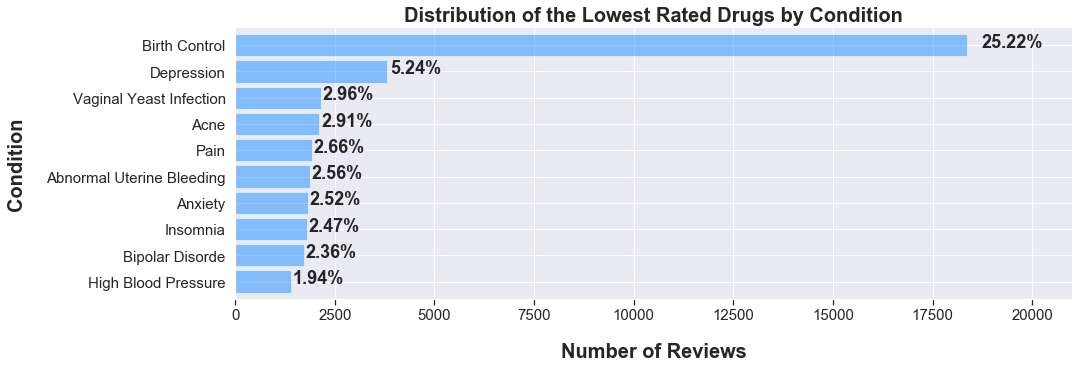

In [19]:
horizontal_barplot(bad_rating_counts[0].sort_values().tail(10), 'Number of Reviews', 'Condition', 
                   'Distribution of the Lowest Rated Drugs by Condition')
plt.xlim([0,21000])
plt.show();


#### Plot 2.2

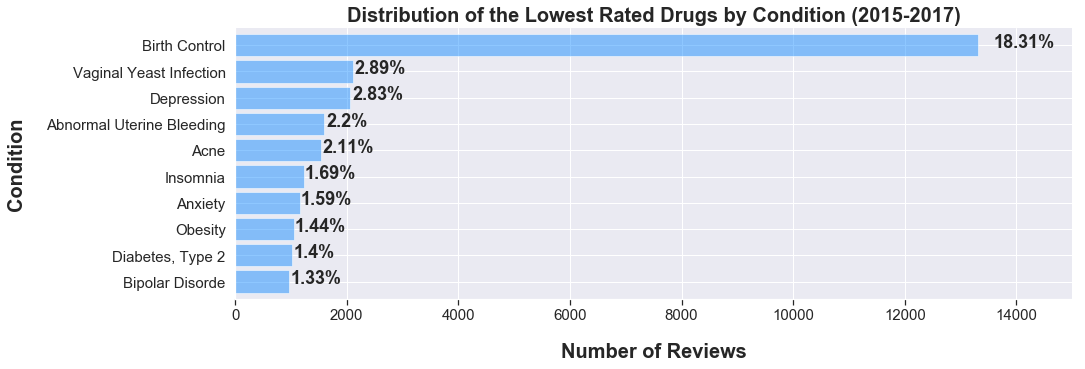

In [20]:
horizontal_barplot(bad_rating_counts_rec[0].sort_values().tail(10), 'Number of Reviews', 'Condition', 
                   'Distribution of the Lowest Rated Drugs by Condition (2015-2017)')
plt.xlim([0,15000])
plt.show();

#### Plot 2.3

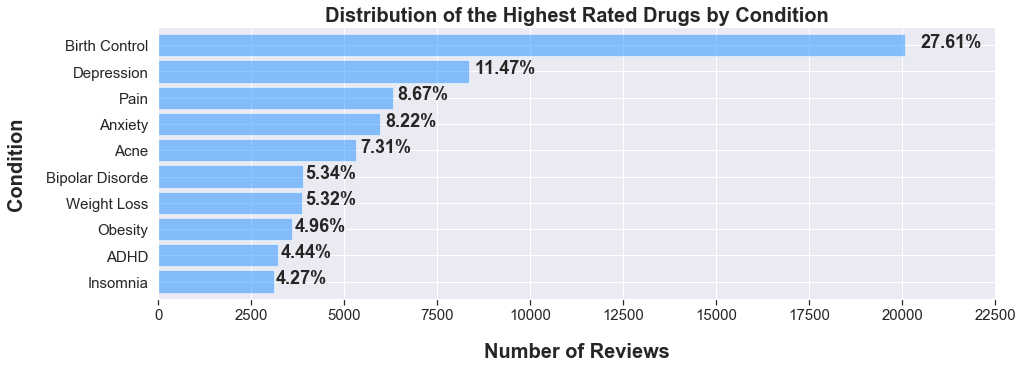

In [21]:
horizontal_barplot(good_rating_counts[0].sort_values().tail(10), 'Number of Reviews', 'Condition', 
                   'Distribution of the Highest Rated Drugs by Condition')
plt.xlim([0,22500])
plt.show();

#### Plot 2.4

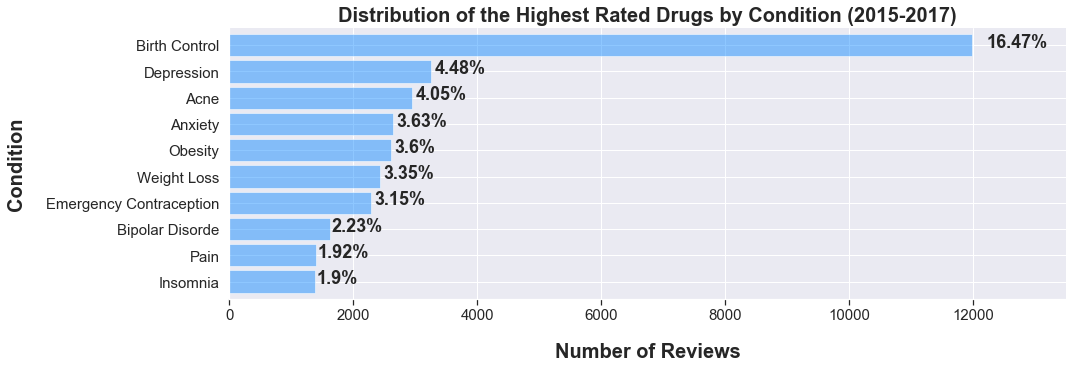

In [22]:
horizontal_barplot(good_rating_counts_rec[0].sort_values().tail(10), 'Number of Reviews', 'Condition', 
                   'Distribution of the Highest Rated Drugs by Condition (2015-2017)')
plt.xlim([0,13500])
plt.show();

We have just seperated the reviews into broad negative and positive reviews and looked at the composition of both groups by condition/drug type. The graphs above show the proportion of each of the top 10 most prevalent conditions that make up both negative and positive reviews. Reviews were analyzed both holistically as well as locally using only the most recently posted reviews between the beginning of 2015 and the end of 2017. It is important to keep in mind that each plot is working with a different number of total reviews and, by extension, a different scale. Thus, it would not be appropriate to compare the measurements of each graph with one another. The best course of interpretation is to treat each plot as a closed system and only compare measurements within a single plot.

It is clear that there are a greater number of positive reviews than negative reviews for many of the conditions. Still, we see that above all other medications, birth control medication seems to compose a substantial proportion of the negative reviews whether one looks at all negative reviews, 25%, or just the most recent ones, 18%. After birth control, we see that the negative reviews begin to spread across a very large range of conditions as the second most negatively reviewed drug category are those for the treatment of depression making up only 5% of all negative reviews which is a stark decrease from the 25% of reviews relating to birth control. 

Looking at the positive reviews, we see that, again, birth control makes up a majority of the positive reviews; ~28% of all positive reviews and 16% of the most recent positive reviews. In addition, other drug types exhibit relatively high proportions with depression, pain, anxiety, acne, bipolar disorder, and weight loss, all making up more than 5% of the total positive reviews.

We must take into account the potential biases of the reviews. The reviews were written by a particular subset of the total drug consuming population that are willing to write reviews. In addition, one may be more willing to write a positive post recommending a particular drug than to write a negative review. Other caveats include the fact that over-the-counter medication, such as birth control, is much more accessible to consumers than are prescription medication which may drive the number of reviews made about them. Standardized surveys would need to be done in order to determine the public's true sentiment towards any specific medications. Nevertheless, our analysis, thus far, hints towards birth control medication as being the most likely avenue a company may want to take when considering drug products they may want to improve upon as it is the drug with the greatest amount of public exposure.

There is a still better way we may determine the overall sentiment towards certain drug types. Let us take a look at the ratio of negative reviews to positive reviews for each of the 10 most reviewed drug products.

In [23]:
# Grabbing the most reviewed types of medication

condition_counts = (data.groupby('condition').size()).reset_index()
condition_counts.set_index('condition', inplace=True)
top_condition_counts = condition_counts[0].sort_values().tail(10)
top_conditions = top_condition_counts.index

# Grabbing the most reviewed types of medication in the past 3 years

data_rec = data.loc[data['date'] > pd.to_datetime('2015-01-01'),]

rec_condition_counts = (data_rec.groupby('condition').size()).reset_index()
rec_condition_counts.set_index('condition', inplace=True)
rec_top_condition_counts = rec_condition_counts[0].sort_values().tail(10)
rec_top_conditions = rec_top_condition_counts.index

In [24]:
# Grabbing the negative reviews of the medication types

top_neg_reviews = data.loc[(data['rating'] < 7) & (data['condition'].isin(top_conditions)),]
top_neg_review_counts = (top_neg_reviews.groupby('condition').size()).reset_index()
top_neg_review_counts.set_index('condition', inplace=True)

# Grabbing the positive reviews of the medication types

top_pos_reviews = data.loc[(data['rating'] >= 7) & (data['condition'].isin(top_conditions)),]
top_pos_review_counts = (top_pos_reviews.groupby('condition').size()).reset_index()
top_pos_review_counts.set_index('condition', inplace=True)

# Grabbing the ratio of negative reviews to positive reviews of each condition

top_condition_ratios = top_neg_review_counts/top_pos_review_counts 

In [25]:
# (2015-2017)
# Grabbing the negative reviews of the medication types

rec_top_neg_reviews = data_rec.loc[(data_rec['rating'] < 7) & (data_rec['condition'].isin(top_conditions)),]
rec_top_neg_review_counts = (rec_top_neg_reviews.groupby('condition').size()).reset_index()
rec_top_neg_review_counts.set_index('condition', inplace=True)

# Grabbing the positive reviews of the medication types

rec_top_pos_reviews = data_rec.loc[(data_rec['rating'] >= 7) & (data_rec['condition'].isin(top_conditions)),]
rec_top_pos_review_counts = (rec_top_pos_reviews.groupby('condition').size()).reset_index()
rec_top_pos_review_counts.set_index('condition', inplace=True)

# Grabbing the ratio of negative reviews to positive reviews of each condition

rec_top_condition_ratios = rec_top_neg_review_counts/rec_top_pos_review_counts 

#### Plot 2.5

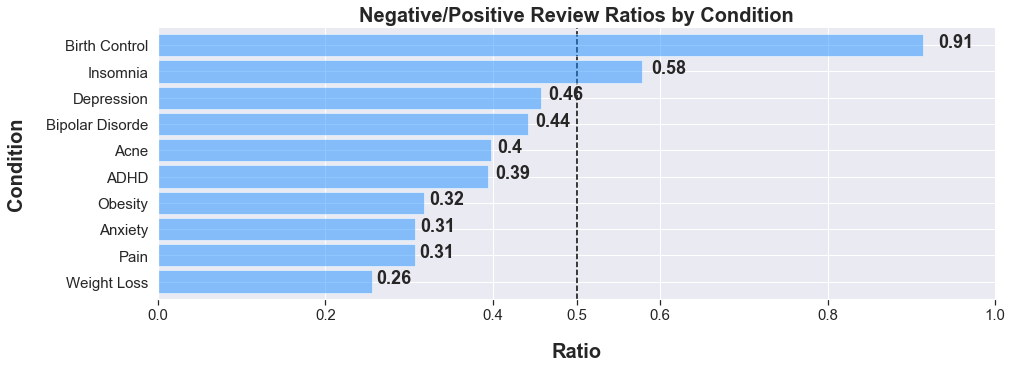

In [26]:
horizontal_barplot(top_condition_ratios[0].sort_values().tail(10), 'Ratio', 'Condition', 
                   'Negative/Positive Review Ratios by Condition', bar_labels = 'raw')
plt.axvline(x=0.5, linestyle='dashed', alpha=1, color='black', zorder=1)
plt.xlim([0,1])
plt.xticks(list(plt.xticks()[0]) + [0.5]);

#### Plot 2.6

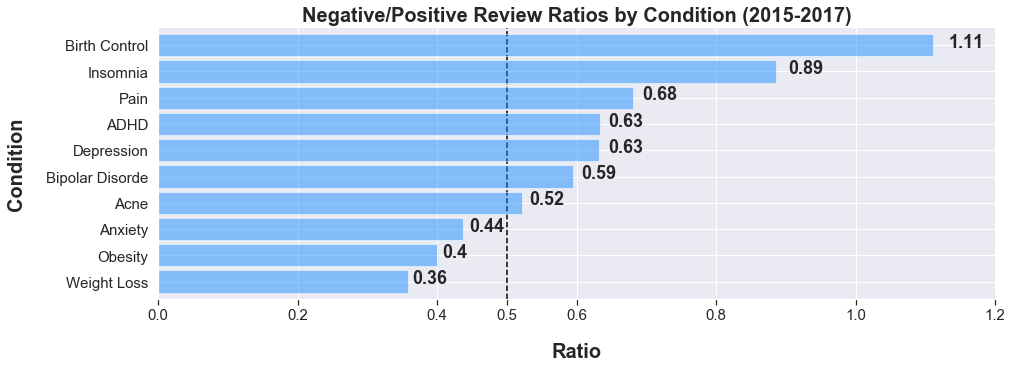

In [27]:
horizontal_barplot(rec_top_condition_ratios[0].sort_values().tail(10), 'Ratio', 'Condition', 
                   'Negative/Positive Review Ratios by Condition (2015-2017)', bar_labels = 'raw')
plt.axvline(x=0.5, linestyle='dashed', alpha=1, color='black', zorder=1)
plt.xlim([0,1.12])
plt.xticks(list(plt.xticks()[0]) + [0.5]);

Above, we have graphs of the ratios of negative to positive reviews of the 10 most reviewed drug types. It is difficult to say what constitutes a 'desireable' ratio for a drug type to possess. Taking a simple approach, let's declare that it is ideal to have only positive reviews and desireable to have more positive reviews than negative. A ratio of 1.0 tells us that there is an equal number of positive and negative reviews present for the corresponding drug type. Also, let's say, arbitrarily, that any drug that does not possess at least twice as many positive reviews as negative indicates room for improvement of the treatment of the corresponding condition. Thus, based on the first graph, we see that birth control and insomnia fit the bill possessing ratios of 0.91 and 0.58, respectively. Although, taking a look at the past 3 years of reviews, we see that additional conditions, besides birth control and insomnia, may show room for improvement with pain, ADHD, depression and bipolar disorder all possessing ratios at or above 0.6. Further more, we see that negative reviews for birth control medication have actually overtaken positive reviews relative to the past 3 years with a ratio of 1.11 and insomnia having a more balanced number of negative and positive reviews, than overall, with a ratio of ~0.9. 

It is important to look at the most recent reviews as these reviews better reflect the current state of the pharmaceutical industry and medicinal science. Drugs improve over time and the number of reviews increase over time as well. By focusing on the last 3 years, we leave out opinions and reviews on older versions of medications and take into consideration experiences of only recent times. And so, based on the previous analysis, birth control, pain, and psychiatric medication seem to be the best candidates for improvement in the current pharmaceutical market. 

## Drug Name Analysis

We will now turn our focus towards the analysis of the names of the highest rated drugs possessing an overall rating of 7 or above. Brand and produt names play a big role in the marketing psychology and may be the difference between a unit sold and a unit left to collect dust on a shelf. By looking at the most highly rated drugs, perhaps we can extract simlar features in their names which could translate to an increase in product sales.

This analysis will be done by looking at the number of words in the name, the letters that the names start with, the number of syllabuls in the name, as well as the types of specific syllabuls contained within the name. Analysis will be restricted to drugs that are intended for the treatment of the same condition. We'd like to make sure that we control for as many variables as possible when comparing drug names and a drug's purpose may influence the name it is given.

It is important to keep in mind that drugs have both a brand name and a generic name. The generic name is assigned by a branch of the U.S. government while the brand name is assigned by a company; many brand names may fall under a single umbrella generic name. It is the brand names that we'd like to compare. During analysis of the drug names, however, it seems as if generic and brand names are mixed together. For this reason, generic names will need to be removed from the names that are collected.

In [28]:
# Seperating out reviews with the highest ratings (overall rating >= 7)

highest_ratings = data.loc[data['rating'] > 6,]

In [29]:
highest_ratings.head()

drugName                     condition  \
0                 Valsartan  Left Ventricular Dysfunction   
1                Guanfacine                          ADHD   
3                Ortho Evra                 Birth Control   
4  Buprenorphine / naloxone             Opiate Dependence   
7              Aripiprazole               Bipolar Disorde   

                                              review  rating       date  \
0  "It has no side effect, I take it in combinati...     9.0 2012-05-20   
1  "My son is halfway through his fourth week of ...     8.0 2010-04-27   
3  "This is my first time using any form of birth...     8.0 2015-11-03   
4  "Suboxone has completely turned my life around...     9.0 2016-11-27   
7  "Abilify changed my life. There is hope. I was...    10.0 2015-03-14   

   usefulCount  
0           27  
1          192  
3           10  
4           37  
7           32

In [30]:
# Grabbing the most reviewed types of medication

condition_counts = (data.groupby('condition').size()).reset_index()
condition_counts.set_index('condition', inplace=True)
top_condition_counts = condition_counts[0].sort_values().tail(5)
top_conditions = top_condition_counts.index

# Grabbing the positive reviews of the medication types

top_pos_reviews = data.loc[(data['rating'] >= 7) & (data['condition'].isin(top_conditions)),]
top_pos_reviews = top_pos_reviews[['drugName', 'condition', 'rating']]

# Isolating the drug names

top_drug_names = list(top_pos_reviews['drugName'].unique())

Lets read in a list of 1,910 generic drug names that were scraped from [needymeds.org](https://www.needymeds.org/generic-drug/list/A). We will use this to remove at least some of the generic names in our lists.

In [31]:
# Importing a list of generic drug names

generic_list = []

with open('generic_name_list.txt', 'r') as f:
    x = f.read().splitlines()

for line in x:
    generic_list.append(line)

In [32]:
# Cleaning/simplifying names in the lists

# top_drug_names

top_drug_names = [x.lower() for x in top_drug_names] # All letters to lowercase

# generic_list

generic_list = [re.sub("[\(\[].*?[\)\]]", "", x) for x in generic_list] # removing parentheses and their contents
generic_list = [" ".join(x.split()) for x in generic_list]  # Removing extra spaces
generic_list = [y for x in generic_list for y in x.split('/')] # Splitting names with '/' into seperate names
generic_list = [y for x in generic_list for y in x.split(' ')] # Splitting names with ' ' into seperate names
generic_list = [x.lower() for x in generic_list] # All letters to lowercase
generic_list = list(set(generic_list)) # list of unique words in generic_list

In [33]:
# Checking if words related to generic names appear in top_drug_names

def words_in_string(word_list, a_string):
    return set(word_list).intersection(a_string.split())

brand_names = []

for name in top_drug_names:
    if not words_in_string(generic_list, name):
        brand_names.append(name) 

In [34]:
# Turning names back to uppercase

brand_names = [x.title() for x in brand_names]
top_pos_reviews['drugName'] = [x.title() for x in top_pos_reviews['drugName']]

In [35]:
top_brand_name_drugs = top_pos_reviews[top_pos_reviews['drugName'].isin(brand_names)]
top_brand_name_drugs = top_brand_name_drugs.reset_index()
top_brand_name_drugs = top_brand_name_drugs.drop('index', axis=1)

In [36]:
# Isolating the drug names based on the condition they treat

birth_control_names = top_brand_name_drugs[top_brand_name_drugs['condition'] == 'Birth Control']
depression_names = top_brand_name_drugs[top_brand_name_drugs['condition'] == 'Depression']
pain_names = top_brand_name_drugs[top_brand_name_drugs['condition'] == 'Pain']
anxiety_names = top_brand_name_drugs[top_brand_name_drugs['condition'] == 'Anxiety']
acne_names = top_brand_name_drugs[top_brand_name_drugs['condition'] == 'Acne']


In [37]:
# A function that returns the most frequently occuring values of a column

def top_count(df, col):
    col_counts = (df.groupby(col).size()).reset_index()
    col_counts.set_index(col, inplace=True)
    top_col_counts = col_counts[0].sort_values().tail(100)
    top_col_counts = top_col_counts.index
    return(top_col_counts)

In [38]:
# Lists of, at most, the top 100 most reviewed brand name drugs for the top 5 most reviewed condition treating drugs.

birth_control_drugs = list(top_count(birth_control_names, 'drugName')) # 100 names
depression_drugs = list(top_count(depression_names, 'drugName')) # 69 names
pain_drugs = list(top_count(pain_names, 'drugName')) # 100 names
anxiety_drugs = list(top_count(anxiety_names, 'drugName')) # 44 names
acne_drugs = list(top_count(acne_names, 'drugName')) # 82

Now that we've isolated our brand name drugs of interest, let's continue with our analysis.

In [39]:
# First letters of each drug name and their counts  

bc_letters = (pd.DataFrame([x[0] for x in birth_control_drugs], columns = ['letter']).groupby('letter').size()).reset_index()
bc_letters.set_index('letter', inplace=True)
dep_letters = (pd.DataFrame([x[0] for x in depression_drugs], columns = ['letter']).groupby('letter').size()).reset_index()
dep_letters.set_index('letter', inplace=True)
pain_letters = (pd.DataFrame([x[0] for x in pain_drugs], columns = ['letter']).groupby('letter').size()).reset_index()
pain_letters.set_index('letter', inplace=True)
anx_letters = (pd.DataFrame([x[0] for x in anxiety_drugs], columns = ['letter']).groupby('letter').size()).reset_index()
anx_letters.set_index('letter', inplace=True)
ac_letters = (pd.DataFrame([x[0] for x in acne_drugs], columns = ['letter']).groupby('letter').size()).reset_index()
ac_letters.set_index('letter', inplace=True)

### Beginning Letter Analysis

#### Plot 3.1.1

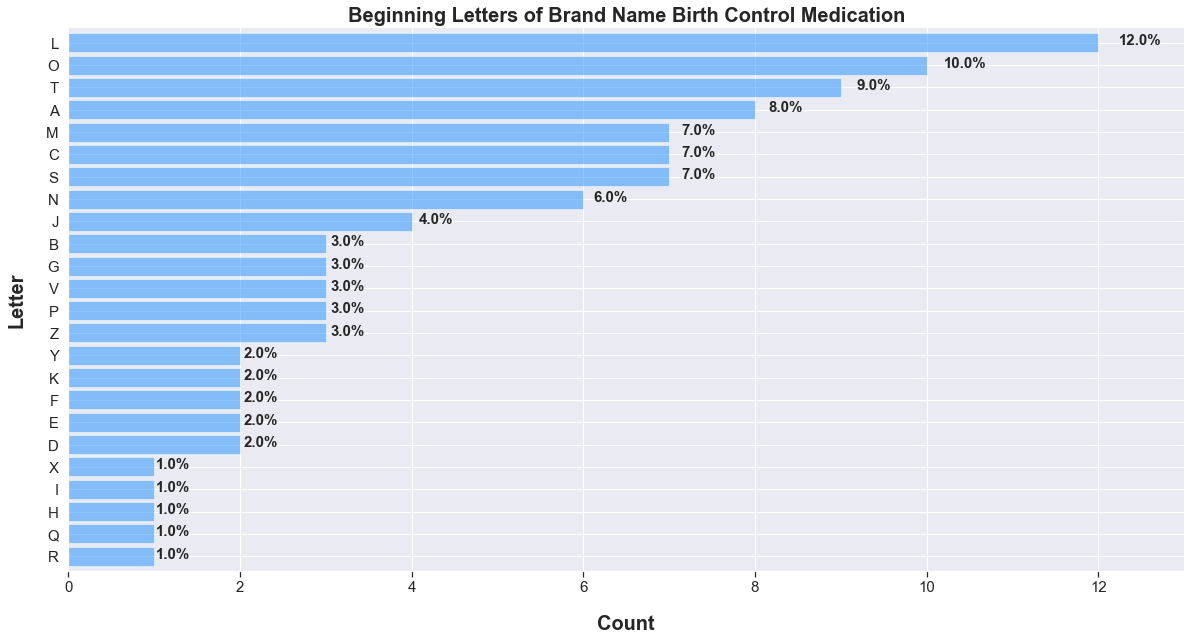

In [40]:
# Distribution of the first letter in birth control brand names

horizontal_barplot(bc_letters[0].sort_values(), 'Count', 'Letter',
                   'Beginning Letters of Brand Name Birth Control Medication', fig_size = (20,10),
                   bar_label_size = 'small', whole = birth_control_drugs)
plt.xlim([0,13]);

#### Plot 3.1.2

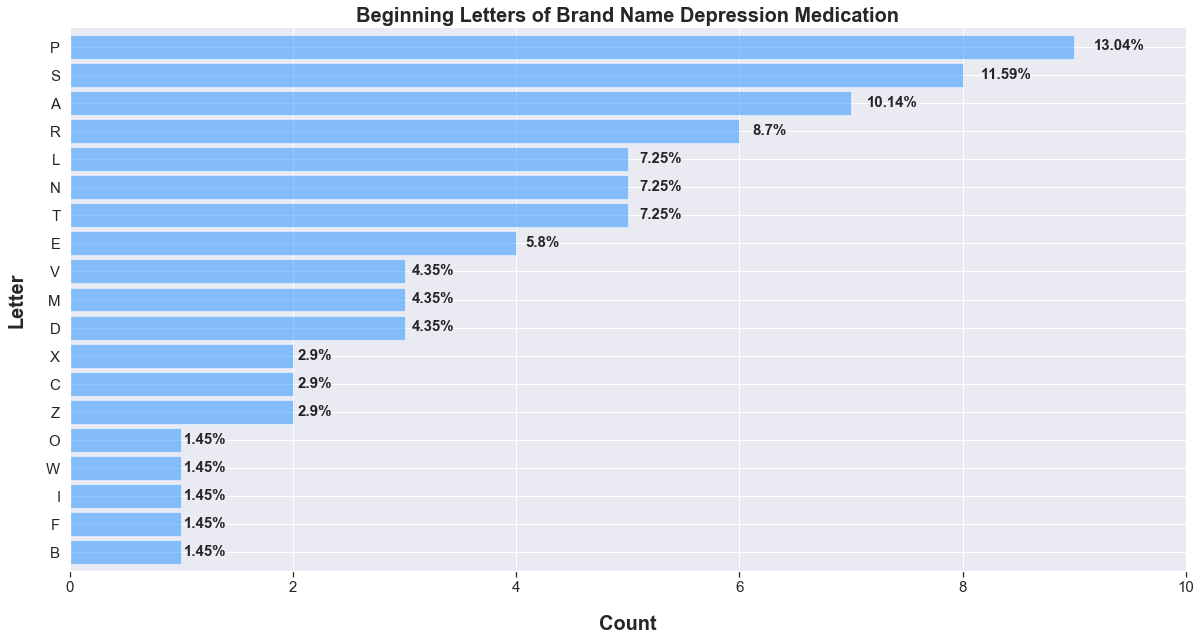

In [41]:
# Distribution of the first letter in depression brand names

horizontal_barplot(dep_letters[0].sort_values(), 'Count', 'Letter',
                   'Beginning Letters of Brand Name Depression Medication', fig_size = (20,10), 
                   bar_label_size = 'small', whole = depression_drugs)
plt.xlim([0,10]);

#### Plot 3.1.3

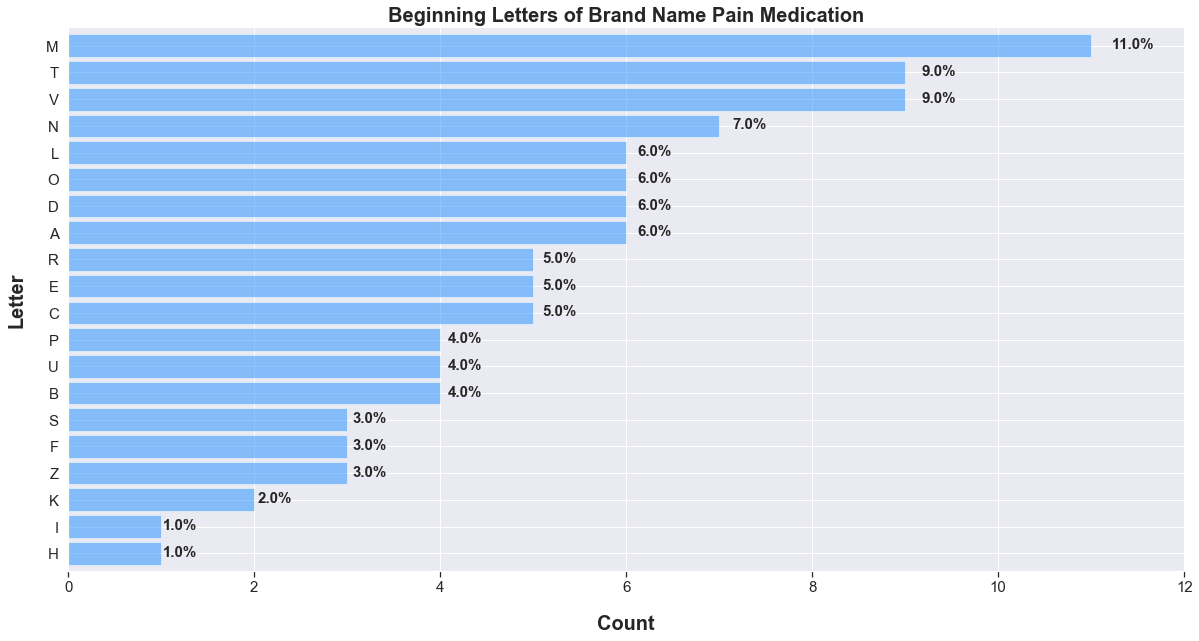

In [42]:
# Distribution of the first letter in pain brand names

horizontal_barplot(pain_letters[0].sort_values(), 'Count', 'Letter',
                   'Beginning Letters of Brand Name Pain Medication', fig_size = (20,10),
                   bar_label_size = 'small', whole = pain_drugs)
plt.xlim([0,12]);

#### Plot 3.1.4

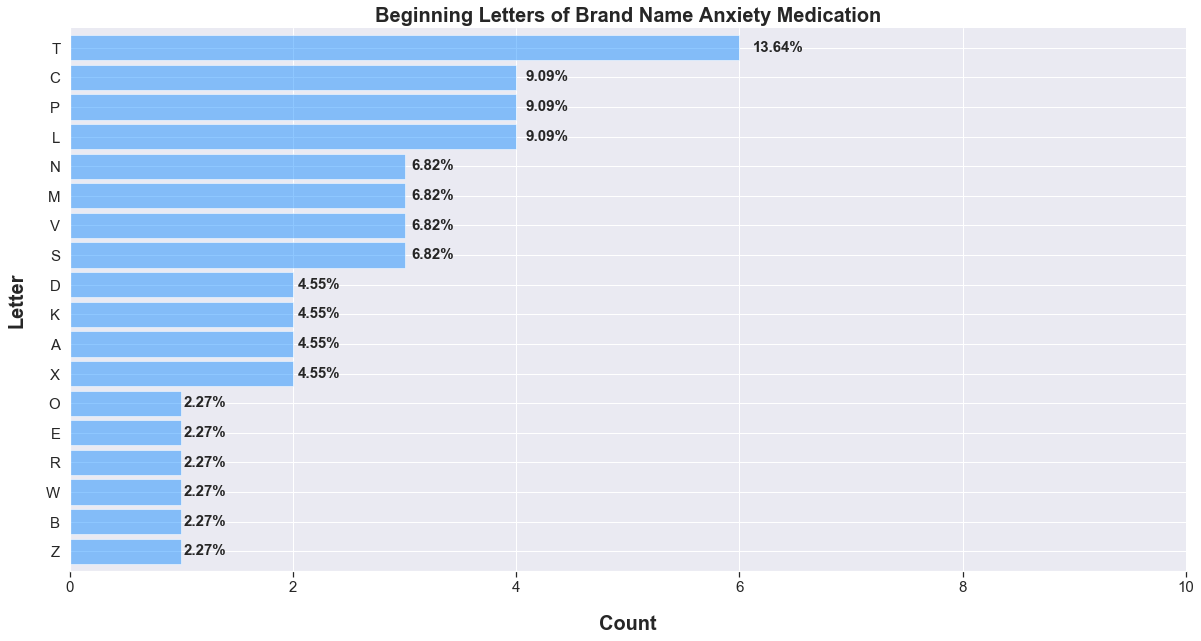

In [43]:
# Distribution of the first letter in anxiety brand names

horizontal_barplot(anx_letters[0].sort_values(), 'Count', 'Letter',
                   'Beginning Letters of Brand Name Anxiety Medication', fig_size = (20,10),
                   bar_label_size = 'small', whole = anxiety_drugs)
plt.xlim([0,10]);

#### Plot 3.1.5

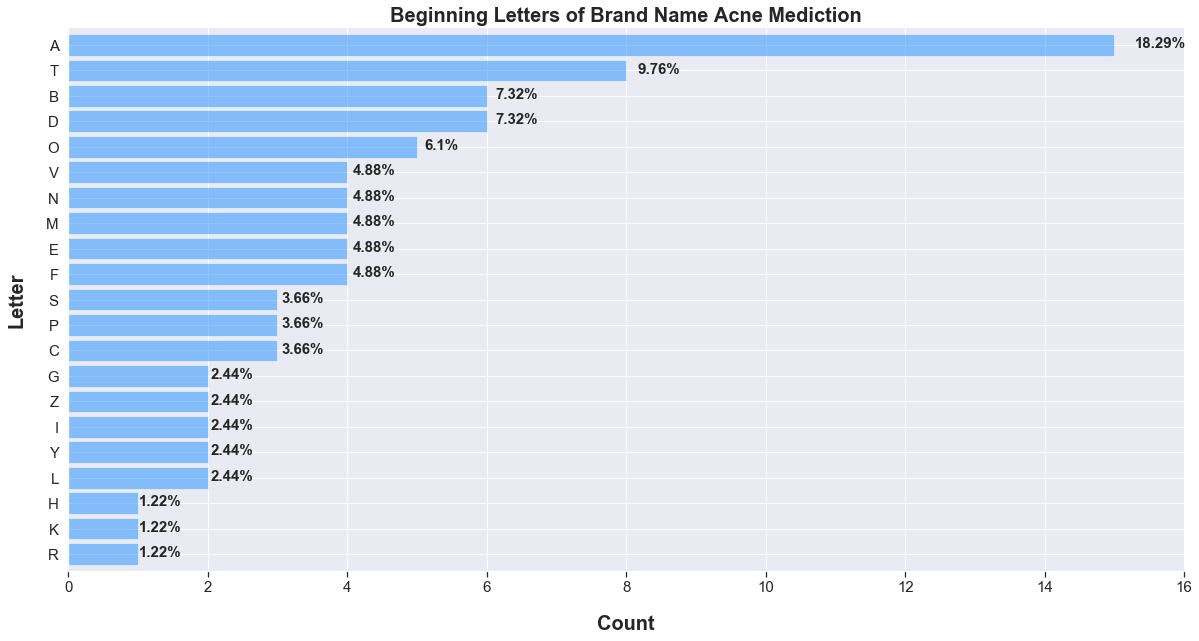

In [44]:
# Distribution of the first letter in acne brand names

horizontal_barplot(ac_letters[0].sort_values(), 'Count', 'Letter',
                   'Beginning Letters of Brand Name Acne Mediction', fig_size = (20,10),
                   bar_label_size = 'small', whole = acne_drugs)
plt.xlim([0,16]);

Above, we have count plots of the most prevalent beginning letters of each drug type and the proportion of medications that possess it as their beginning letter. The goal was to analyze no more than 100 unique brand name drugs for each drug type. Out of the 5 drug types that were analyzed, depression, anxiety, and acne had the fewest observations in their samples with 69, 44, and 82 brand name drugs, respectivley. Birth control and pain medications had 100 drug names in each of their samples. 

Below is a summary table of the 3 most prevalent beginning letters for each drug type:

#### Table 3.1.1

|   Drug Type   | Letter |   Proportion   | Total Drug Names|
|---------------|--------|----------------|-----------------|
| Birth Control |    L   |      12.0%     |       100       |
| Birth Control |    O   |      10.0%     |       100       |
| Birth Control |    T   |       9.0%     |       100       |
|               |        |                |                 |
|  Depression   |    P   |      13.0%     |        69       |
|  Depression   |    S   |      11.6%     |        69       | 
|  Depression   |    A   |      10.1%     |        69       |
|               |        |                |                 |
|     Pain      |    M   |      11.0%     |       100       |
|     Pain      |    T   |       9.0%     |       100       |
|     Pain      |    V   |       9.0%     |       100       |
|               |        |                |                 |
|    Anxiety    |    T   |      13.6%     |        44       |
|    Anxiety    | C, P, L|       9.0%     |        44       |
|               |        |                |                 |
|     Acne      |    A   |      18.3%     |        82       |
|     Acne      |    T   |       9.8%     |        82       |
|     Acne      |  B, D  |       7.3%     |        82       |

Clearly, each drug type possesses drug names with letters that appear in the beginning of names with varying degrees of frequency. Here, we have isolated the most common of such letters for each drug type. Although there very well may not be any correlation between the drug name and the number of sales, it is an interesting concept to explore and we see that drug manufacturers seem to use certain structural characteristics in their names.

One may also reproduce an analysis similar to the one just done but for the ending letters of the generic names. This analysis will not be included as the beginning letters are, arguebly, more significant and the analysis would mirror that which was done for the beginning letters. If the results of this analysis were to be taken into consideration for real-world decisions and applications, then an analysis of the ending letters would be done as well.

### Word Count Analysis

We'll now move on to determining the number of words that make up the names of each drug type. For this analysis, names will be seperated along hyphens, spaces, and forward slashes. Numbers, 'Fe', and other extraneous characters will be removed.

In [45]:
# Function that returns a list of the lengths of each element in a list of lists

def get_list_lens(lst):
    lengths = []
    for x in lst:
        lengths.append(len(x))
    return(lengths)

In [52]:
# A function that cleans the lists and prepares them for syllabification

def simplify_names(old_list, hyphenate = False):

    new_list = [x.lower() for x in old_list] # all to lowercase
    new_list = [re.sub("\d", "", x) for x in new_list] # removing numbers
    new_list = [re.sub("fe", "", x) for x in new_list] # removing 'Fe'
    new_list = [re.sub(" / ", "", x) for x in new_list] # removing '/'
    new_list = [re.sub(" .", "", x) for x in new_list] # removing '.'
    new_list = [" ".join(x.split()) for x in new_list] # removing extra space
    
    if hyphenate == True:
        new_list = [re.sub(" ", "-", x) for x in new_list] # replacing leftover spaces with '-'

    return(new_list)

In [53]:
# Splitting up each name into seperate words

bc_word_counts = get_list_lens([re.split('\W+', x) for x in simplify_names(birth_control_drugs)])
dep_word_counts = get_list_lens([re.split('\W+', x) for x in simplify_names(depression_drugs)])
pain_word_counts = get_list_lens([re.split('\W+', x) for x in simplify_names(pain_drugs)])
anx_word_counts = get_list_lens([re.split('\W+', x) for x in simplify_names(anxiety_drugs)])
ac_word_counts = get_list_lens([re.split('\W+', x) for x in simplify_names(acne_drugs)])

In [54]:
# Function to create a dataframe from a list of word counts 

def counts_to_df(lst, drug_type):
    
    df = (pd.DataFrame(lst, columns = ['number_of_words'])).groupby('number_of_words').size().reset_index()
    df.columns = ['number_of_words','count']
    df['drug_type'] = drug_type  
    return(df)

In [55]:
bc_counts_df = counts_to_df(bc_word_counts, 'Birth Control')
dep_counts_df = counts_to_df(dep_word_counts, 'Depression')
pain_counts_df = counts_to_df(pain_word_counts, 'Pain')
anx_counts_df = counts_to_df(anx_word_counts, 'Anxiety')
ac_counts_df = counts_to_df(ac_word_counts, 'Acne')

word_count_df = pd.concat([bc_counts_df, dep_counts_df, pain_counts_df, anx_counts_df, ac_counts_df])

#### Plot 3.2.1

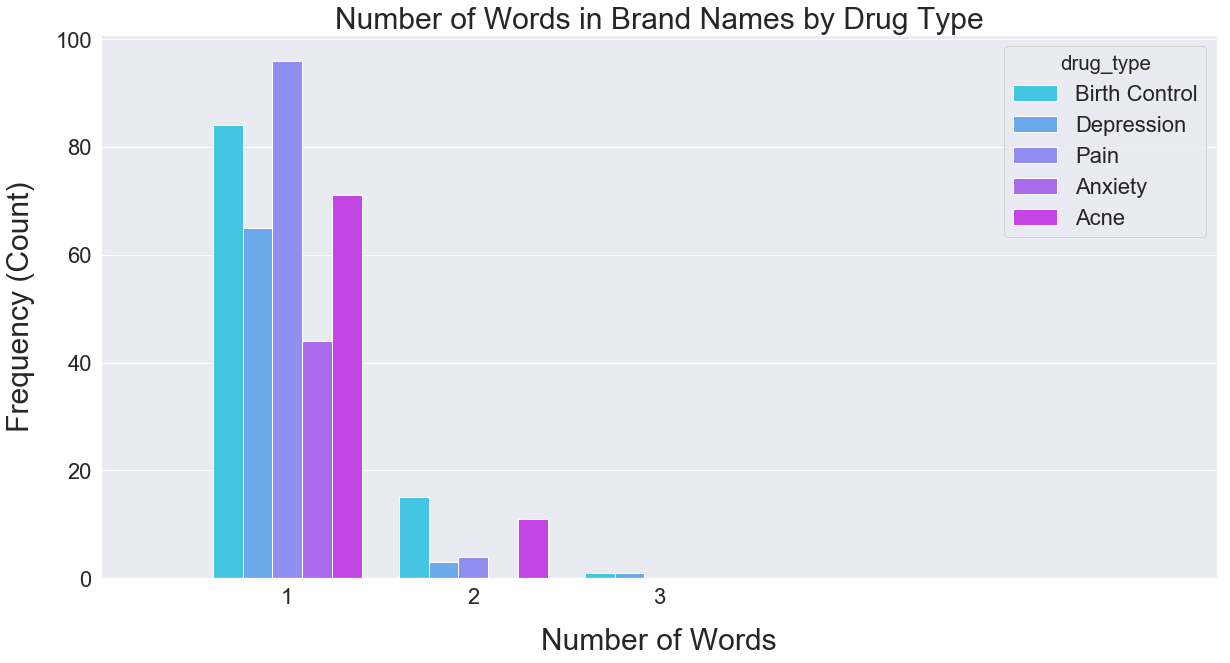

In [69]:
plt.figure(figsize=(20,10))
plt.style.use('seaborn-dark-palette')
sns.set(font_scale = 2)
sns.barplot(x='number_of_words', y='count', hue='drug_type', data = word_count_df, palette = 'cool') 
plt.xlim(-1,5)
plt.title('Number of Words in Brand Names by Drug Type', fontsize=30)
plt.xlabel('Number of Words', fontsize=30, labelpad=20)
plt.ylabel('Frequency (Count)', fontsize=30, labelpad=20);

Here, we see that, among all drug types, it is much more common to have a brand name that is a single word than a combination of multiple words. Such combinations included those seperate by spaces and hyphens. 

### Syllable Analysis

In order to analyze the syllables of each name, we will need to find a way to seperate the names into syllables in the first place. The problem of seperating words into their constituent syllables is similar to that of hyphenation used in typesetting. A discussion of the TeX system, a popular hyphenation system used in the past, and an improvement on it was outlined in a paper entitled [*'Word Hy-phen-a-tion by Com-put-er'*](http://www.gtoal.com/wordgames/liang/liang.pdf) by Franklin Mark Liang of the Stanford Universty computer science dapartment, in California, in 1983.

The original TeX system was first created by Donald Knuth in 1978 and was based on 3 primary rules:

1. Suffix Removal
2. Prefix Removal
3. Vowel-Consonant-Consonant-Vowel (vccv) Breaking

Liang improved upon this system by, among other things, using hyphenation patterns and inhibiting patterns; patterns that tell the computer when to hyphenate and when not to hyphenate, respectively. We will now create a naive algorithm that uses the previously mentioned ideas of the TeX system as the foundation for the seperation of brand drug names into syllables.

In [61]:
# Importing a custom function that takes a drug name and returns a list of the syllables of the name

from syllabication import count_syllables

In [62]:
bc_syllable_counts = [3, 3, 2, 5, 2, 4, 3, 3, 4, 2, 2, 2, 2, 4, 2, 3, 3, 2, 3, 2, 4, 3, 3, 3, 4, 2, 4, 2, 3, 3, 2, 3, 
                     2, 3, 2, 3, 3, 3, 3, 3, 2, 2, 4, 4, 3, 3, 3, 4, 4, 3, 3, 2, 4, 3, 4, 2, 3, 3, 2, 5, 3, 3, 3, 3, 2,
                     2, 2, 2, 2, 2, 5, 3, 3, 3, 4, 4, 3, 3, 3, 2, 2, 1, 3, 3, 6, 3, 3, 3, 3, 3, 3, 5, 3, 2, 3, 3, 2, 
                     3, 3, 3]

In [63]:
auto_bc_syllable_counts = [count_syllables(name) for name in simplify_names(birth_control_drugs, hyphenate = True)]

In [64]:
syllable_check = []
for i in range(0,100):
    syllable_check.append(bc_syllable_counts[i] == auto_bc_syllable_counts[i])
sum(syllable_check)

74

Our naive syllabication seems to only capture the corret number of syllables in 74% of the birth control medication names and, because the birth control names were specifically used to create the hyphenation rules employed in the algorithm, it is sure to exhibit a lower performance for lists of other drug types. Unsurprisingly, the problem of seperating names/words into syllables is fairly difficult to implement in a simple pattern matching algorithm. For this reason, we will create a function that prompts the user to input the number of syllables in each name and a count of the syllables in each name will be obtained in this way. As a result, an analysis of the syllables in generic brand name medications will be restricted to a count of the syllabuls. Analysis of the specific kinds of syllables that make up each name would be too labor intensive for the purposes of this project. 

In [65]:
def syllablize(lst):
    
    syllable_counts = []
    
    for name in lst:
        
        print('\n', name)
        count = input("Please input the number of syllables in the name above. Type 'stop' to end the session.")
        
        if count.lower() == 'stop':
            break
        elif count.isdigit():
            syllable_counts.append(count)
        else:
            while count.isalpha():
                count = input("The response is invalid. Please provide a digit between 1 and 9")
                if count.lower() == 'stop':
                    break
                
    print("All Done! You can now have a count of all the syllables in your names")
    return(syllable_counts)

In [66]:
# The code is being rerun but syllablize was already used and the final syllable counts obtained
# Importing the list of syllable counts for each list of simplified generic names of each drug type

from syllable_counts import *

In [67]:
bc_syllables_df = counts_to_df(bc_syllable_counts, 'Birth Control')
dep_syllables_df = counts_to_df(dep_syllable_counts, 'Depression')
pain_syllables_df = counts_to_df(pain_syllable_counts, 'Pain')
anx_syllables_df = counts_to_df(anx_syllable_counts, 'Anxiety')
ac_syllables_df = counts_to_df(ac_syllable_counts, 'Acne')

syllable_count_df = pd.concat([bc_syllables_df, dep_syllables_df, pain_syllables_df, anx_syllables_df, ac_syllables_df])
syllable_count_df.columns = ['number_of_syllables', 'count', 'drug_type']

#### Plot 3.3.1

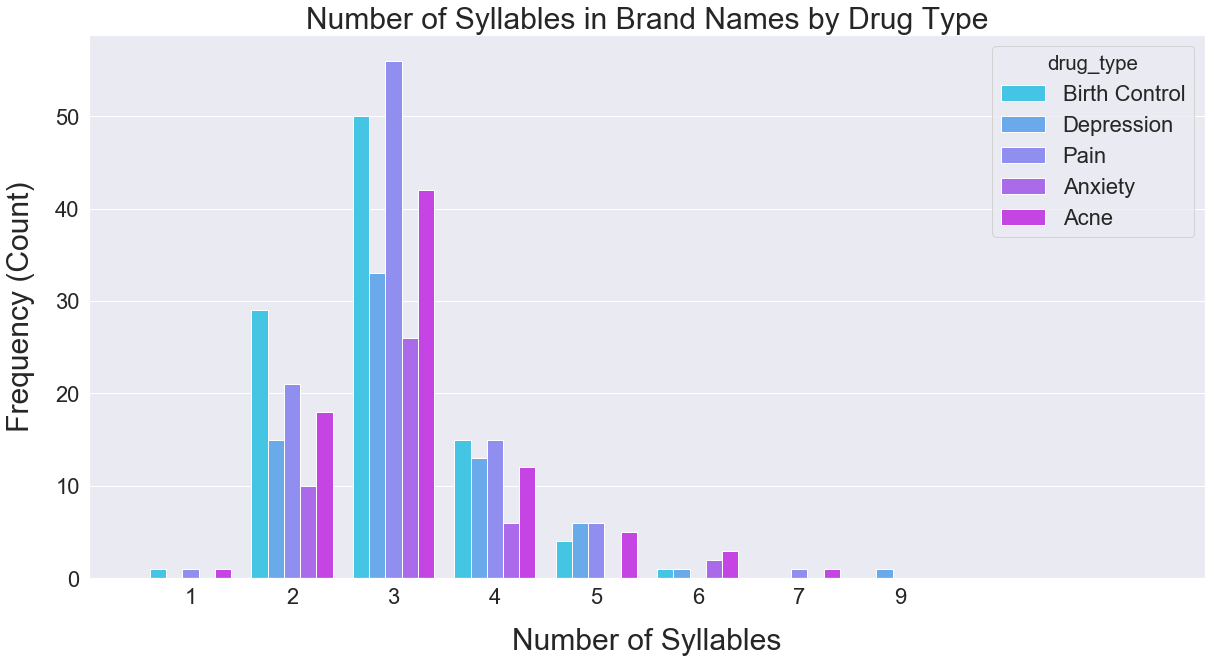

In [70]:
plt.figure(figsize=(20,10))
plt.style.use('seaborn-dark-palette')
sns.set(font_scale = 2)
sns.barplot(x='number_of_syllables', y='count', hue='drug_type', data = syllable_count_df, palette = 'cool') 
plt.xlim(-1,10)
plt.title('Number of Syllables in Brand Names by Drug Type', fontsize=30)
plt.xlabel('Number of Syllables', fontsize=30, labelpad=20)
plt.ylabel('Frequency (Count)', fontsize=30, labelpad=20);

We see, from the graph above, that most of the generic drug names are made up of 3 syllables no matter the condition the medication is meant to treat. We also see a slight positive skew to the data as some of the names possess up to 9 syllables. This is likely caused by the presence of a few generic names, which are often long, as they describe the chemical make-up of the active ingredient in the drug.

This analysis proved quite difficult. Some things that may have improved the workflow of the analysis include standardizing the pronunciation of the names; the english language is quite malleable and the number of syllables one detects may vary based on how the name is pronounced. In addition, other rules and standardization, I believe, could have been put into place that would increased the fidelity of the resulting syllable counts.

Again, one musn't directly compare frequencies of different drug types possessing the same syllable count as each drug type comes from a different sample size of names. Drug types were aggregated to a single plot for brevity.

## Drug Review Analysis

Now that we have analyzed the names themselves, we will attempt to ascertain the gripes that reviewers had of medications and determine what users look for in their drugs by analyzing those reviews that were deemed 'most helpful'. Both of these goals may be reached by an analysis of the most common words appearing in the reviews. The appropriate reviews will be seperated out on the basis of condition type, overall rating, and usefulness count. The most common words will then be counted and a word cloud created to visualize the most prevalent words within certain reviews and, hopefully, allowing us to identify certain key words that hint towards the desires and complaints of the reviewers.

The goals previously mentioned could be reached with the help of Parts-of-Speach Tagging (PoST) as well. This is an NLP technique in which individual words are labelled with their parts-of-speech based on their position within the structure of a sentence. The words would be labelled as nouns, verbs, adjectives, etc. With such identifications, we could then create a word cloud to visualize the most prevalent words within the reviews with greater granularity. Unfortunately, do the the host of grammar and punctuation errors present throughout the reviews, PoST is not able to be accurately performed.

To produce the analysis that will follow, the reviews need to, first, be cleaned by removing all punctuation, extraneous characters, numbers, and removing any words irrelevant to our goals.

### Data Cleaning 

In [71]:
# Let's extract the reviews from the data

reviews = data[['review']]
reviews.head()

review
0  "It has no side effect, I take it in combinati...
1  "My son is halfway through his fourth week of ...
2  "I used to take another oral contraceptive, wh...
3  "This is my first time using any form of birth...
4  "Suboxone has completely turned my life around...

In [72]:
# Objects imported/downloaded from nltk package

# nltk.download('stopwords')
#nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [73]:
# Let's clean each review and add it to a corpus

#pd.options.display.max_colwidth = 100

corpus = []
for i in range(0, len(reviews)):
    review = reviews.iloc[i,0]
    review = review.strip('\"')     #.replace('"', '') # removing quotation marks
    review = re.sub('[^a-zA-Z]', ' ', review) # relpacing all non-letter characters with a space
    review = review.lower() # turning all letters lowercase 
    review = review.split() # splitting review into a list of words
    ps = PorterStemmer() # stemming object; will replace words with their root/general form
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))] # removing irrelevant words
    review = ' '.join(review) # turning the list to a single string
    corpus.append(review)

In [74]:
# A new dataframe containing each cleaned review and the corresponding condition, rating, and usefulCount

new_reviews = pd.concat([pd.Series(corpus, name = 'review'), data[['condition', 'rating', 'usefulCount']]], axis=1)

In [75]:
new_reviews.head()

review  \
0         side effect take combin bystol mg fish oil   
1  son halfway fourth week intuniv becam concern ...   
2  use take anoth oral contracept pill cycl happi...   
3  first time use form birth control glad went pa...   
4  suboxon complet turn life around feel healthie...   

                      condition  rating  usefulCount  
0  Left Ventricular Dysfunction     9.0           27  
1                          ADHD     8.0          192  
2                 Birth Control     5.0           17  
3                 Birth Control     8.0           10  
4             Opiate Dependence     9.0           37

In [76]:
# Seperating the cleaned reviews by condition, rating, and usefulCount 

neg_bc_reviews = " ".join(pd.Series.tolist(new_reviews.loc[(new_reviews['condition'] == 'Birth Control') & (new_reviews['rating'] < 7), 'review']))
neg_dep_reviews = " ".join(pd.Series.tolist(new_reviews.loc[(new_reviews['condition'] == 'Depression') & (new_reviews['rating'] < 7), 'review']))
neg_pain_reviews = " ".join(pd.Series.tolist(new_reviews.loc[(new_reviews['condition'] == 'Pain') & (new_reviews['rating'] < 7), 'review']))
neg_anx_reviews = " ".join(pd.Series.tolist(new_reviews.loc[(new_reviews['condition'] == 'Anxiety') & (new_reviews['rating'] < 7), 'review']))
neg_ac_reviews = " ".join(pd.Series.tolist(new_reviews.loc[(new_reviews['condition'] == 'Acne') & (new_reviews['rating'] < 7), 'review']))

pos_bc_reviews = " ".join(pd.Series.tolist(new_reviews.loc[(new_reviews['condition'] == 'Birth Control') & (new_reviews['rating'] > 6), 'review']))
pos_dep_reviews = " ".join(pd.Series.tolist(new_reviews.loc[(new_reviews['condition'] == 'Depression') & (new_reviews['rating'] > 6), 'review']))
pos_pain_reviews = " ".join(pd.Series.tolist(new_reviews.loc[(new_reviews['condition'] == 'Pain') & (new_reviews['rating'] > 6), 'review']))
pos_anx_reviews = " ".join(pd.Series.tolist(new_reviews.loc[(new_reviews['condition'] == 'Anxiety') & (new_reviews['rating'] > 6), 'review']))
pos_ac_reviews = " ".join(pd.Series.tolist(new_reviews.loc[(new_reviews['condition'] == 'Acne') & (new_reviews['rating'] > 6), 'review']))


most_useful_clean_reviews = " ".join(pd.Series.tolist(new_reviews.loc[new_reviews['usefulCount'] >= 100, 'review']))


In [77]:
# A function that takes two series and returns a list of the most common elements to both series

def common_words(series_1, series_2):
    
    # Tokenize the series and turn them to lists of words
    list_1 = nltk.word_tokenize(series_1)
    list_2 = nltk.word_tokenize(series_2)
    
    # Getting a count of the 100 most common words in each list
    counter_l1 = Counter(list_1).most_common(100)
    counter_l2 = Counter(list_2).most_common(100)
    
    # Extracting the first element of each tuple
    most_common_l1 = [x[0] for x in counter_l1]
    most_common_l2 = [x[0] for x in counter_l2]
    
    # Getting a list of the words common to both lists
    list_common = list(set(most_common_l1).intersection(most_common_l2))
    
    return(list_common)

In [78]:
# A function that outputs two wordclouds adjacent to eachother  

def make_wordcloud(text_1, text_2, condition, stop_words = ''):

    stopwords = set(STOPWORDS)
    stopwords.update(stop_words)
    
    # Create and generate a word cloud image:
    wordcloud_1 = WordCloud(max_words=100, background_color="black", colormap="autumn",
                         width = 400, height = 300, stopwords=stopwords).generate(text_1)
    
    wordcloud_2 = WordCloud(max_words=100, background_color="black", colormap="cool",
                         width = 400, height = 300, stopwords=stopwords).generate(text_2)


    # Display the generated image:
    
    fig, ax = plt.subplots(2,2,figsize=(20,15))

    plt.subplot(1,2,1)
    plt.imshow(wordcloud_1, interpolation='bilinear')
    plt.axis("off")
    plt.title("Negative %s Reviews" % (condition), fontsize = 35, weight = 'bold', pad = 20)
    
    plt.subplot(1,2,2)
    plt.imshow(wordcloud_2, interpolation='bilinear')
    plt.axis("off")
    plt.title("Positive %s Reviews" % (condition), fontsize = 35, weight = 'bold', pad = 20)

    plt.tight_layout()
    
    plt.show()

### Results

Below are the final results of the most common words that appear for reviews of each drug type, birth control, depression, pain, anxiety, and acne, in word cloud form. The word clouds were seperated into negative and positive reviews. The 100 most common words were first identified for each set and the words common to both sets were removed in order to obtain a better contrast of words that differ between the negative and positive reviews. The meaning of some words that appear must be inferred as many reviews contain incorrect grammer which result in incomplete words being included in the word clouds. 

#### Plot 4.1

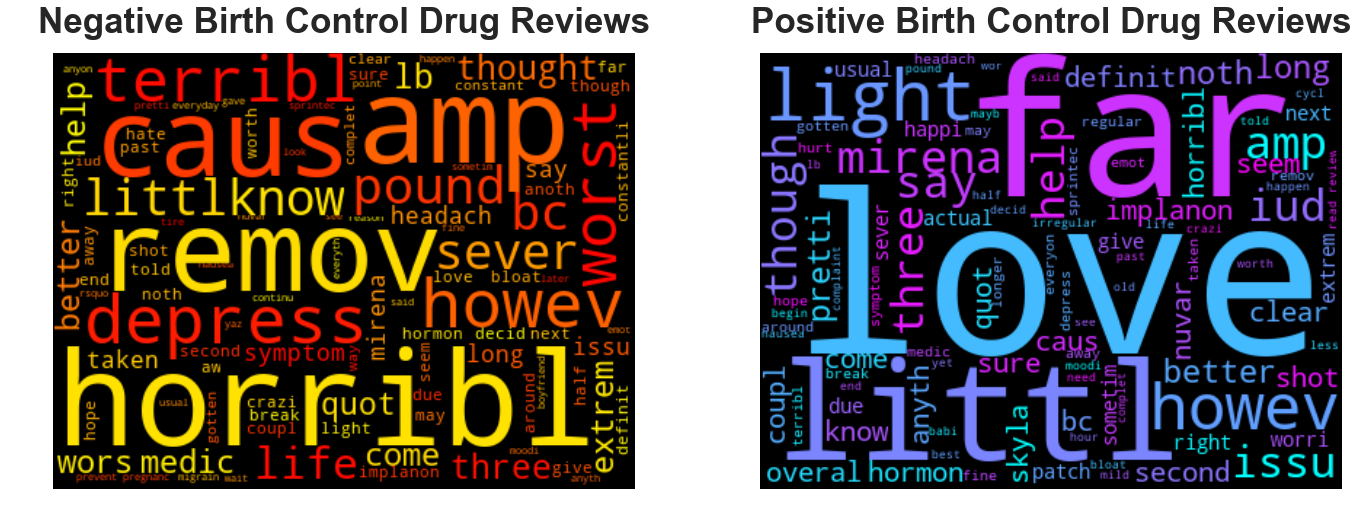

In [79]:
# Printing wordclouds for the 'birth control' reviews

bc_stopwords = common_words(neg_bc_reviews, pos_bc_reviews)
#bc_stopwords.extend(('gonna','wanna'))

make_wordcloud(neg_bc_reviews, pos_bc_reviews, 'Birth Control Drug', stop_words = bc_stopwords)

We see in the negative reviews for birth control drugs, words such as 'terrible' and 'horrible' appear often likely referring to the users' experience with a certain medication or procedure. Other words such as 'amp', likely to mean 'cramp', 'depress', and 'pound' signal potential side effects that appear as a result of the interventions undergone. As they are often hormone regulators, birth control medications may cause changes in mood, affect, and weight gain in addition to their intended effects. Cramps may also be a defining side effect of many such medications and may cause one to decide to 'remove' their IUDs. These are several ideas of potential sticking points that manufacturers of birth control medication may want to address and improve in their own medications. 

#### Plot 4.2

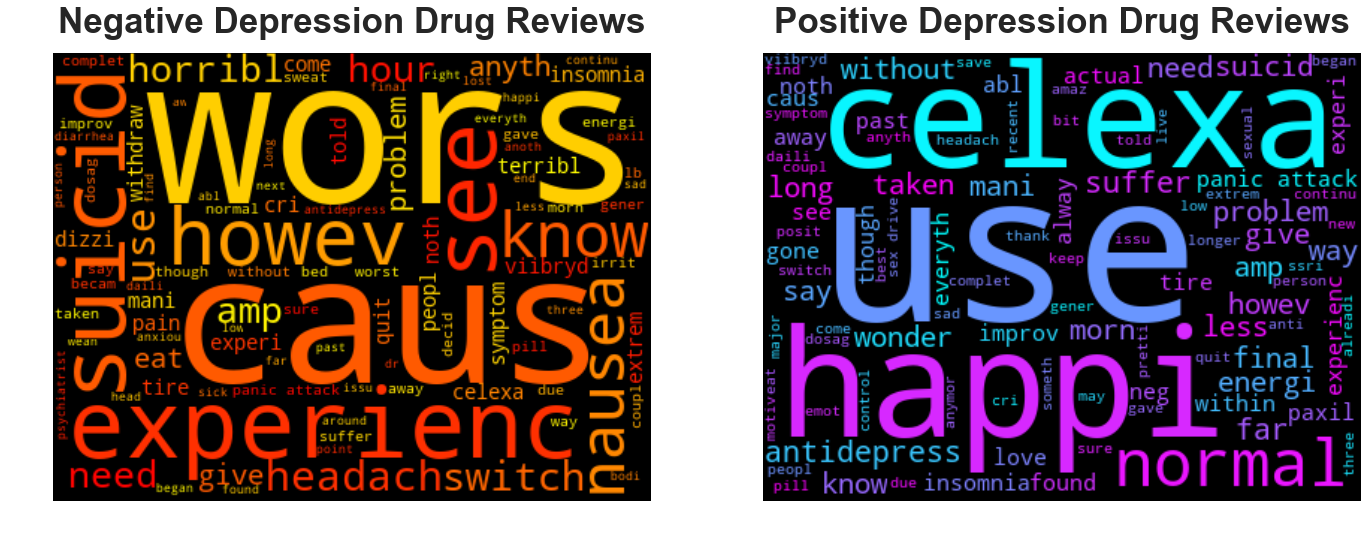

In [80]:
# Printing wordclouds for the 'depression' reviews

dep_stopwords = common_words(neg_dep_reviews, pos_dep_reviews)
#dep_stopwords.append('gonna')

make_wordcloud(neg_dep_reviews, pos_dep_reviews, "Depression Drug", stop_words = dep_stopwords)

For medications intended to treat depression, we see that topics commonly addressed in negative reviews include 'headaches', 'nausea', 'insomnia, and 'worse' is also commonly seen in such reviews. This hints that headaches, nausea, and insomnia are common side effects among depression medication and may, at times, even worsen a user's depression. Similar words such as 'headache' and 'insomnia' also appear in positive reviews but are not as prevalent. 

#### Plot 4.3

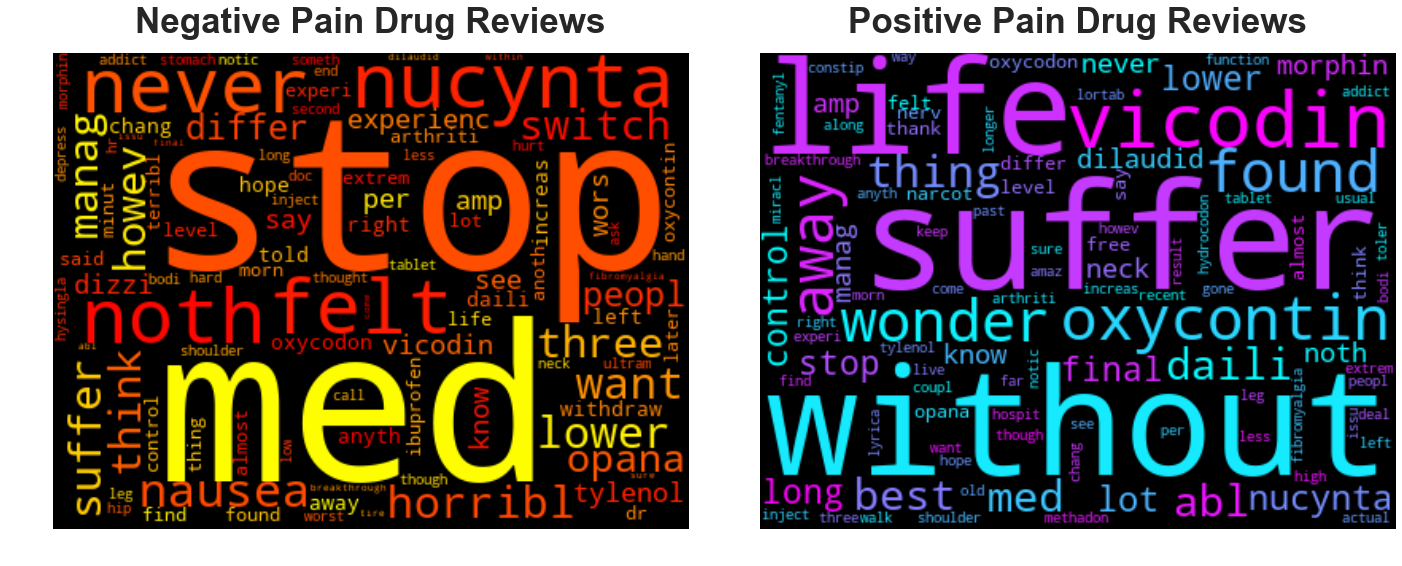

In [81]:
# Printing wordclouds for the 'pain' reviews

pain_stopwords = common_words(neg_pain_reviews, pos_pain_reviews)

make_wordcloud(neg_pain_reviews, pos_pain_reviews, "Pain Drug", stop_words = pain_stopwords)

Negative reviews of pain medications often have the word 'stop' which a reviewer may use to refer to their pain stopping or having to stop using a certain medication, which is more likely. Other words, such as 'want' and 'withdraw', may hint towards reasons why a person may want, or need, to stop taking their medication as a result of incresed tolerance and dependence on the drug. 'nausea' and 'dizzy' are other words that appear in negative reviews but are not as common in positive reviews. These may refer to common side effects of certain pain mediating medications. At the best of times, pain medications seem to relieve the users pain leading to a 'life' 'without' pain.

#### Plot 4.4

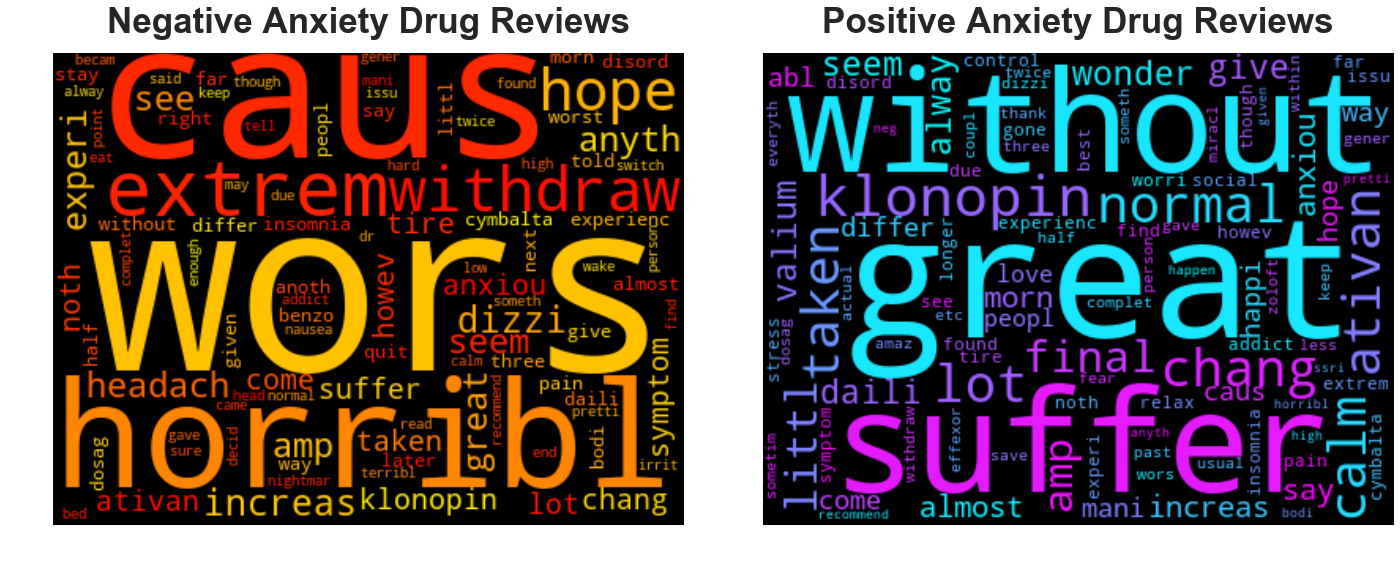

In [82]:
# Printing a wordcloud for the 'anxiety' reviews

anx_stopwords = common_words(neg_anx_reviews, pos_anx_reviews)

make_wordcloud(neg_anx_reviews, pos_anx_reviews, "Anxiety Drug", stop_words = anx_stopwords)

The worst experiences with anxiety medication seem to be those in which a person's anxiety actually worsens as a result of taking the drug. Side effects such as 'dizziness', 'withdrawls', 'insomnia', and 'headaches' seem to be common among users with negative experiences with their anxiety medication. 

#### Plot 4.5

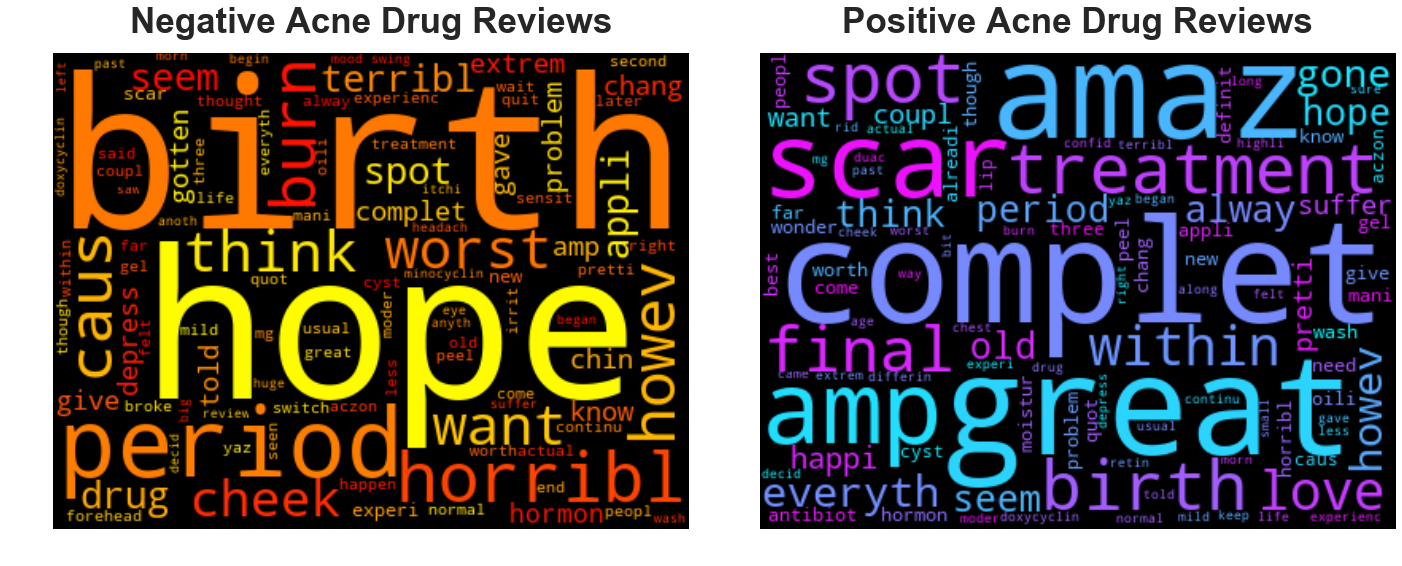

In [83]:
# Printing a wordcloud for the 'acne' reviews

ac_stopwords = common_words(neg_ac_reviews, pos_ac_reviews)

make_wordcloud(neg_ac_reviews, pos_ac_reviews, "Acne Drug", stop_words = ac_stopwords)

Among acne medication users, 'burn'-ing sensations seem to become a common experienced side effect. 'birth' and 'period' appear often as well. It is well known that certain medications used for birth control are also used for acne treatment. More generally, some acne medications work by manipulating hormone levels in the body which can cause changes in mensturation and ovulation cycles among women. This is a possible connection between 'acne', 'preiod', and 'birth', and the decoupling of such relationships may increase the effectivness of acne medication.

#### Plot 4.6

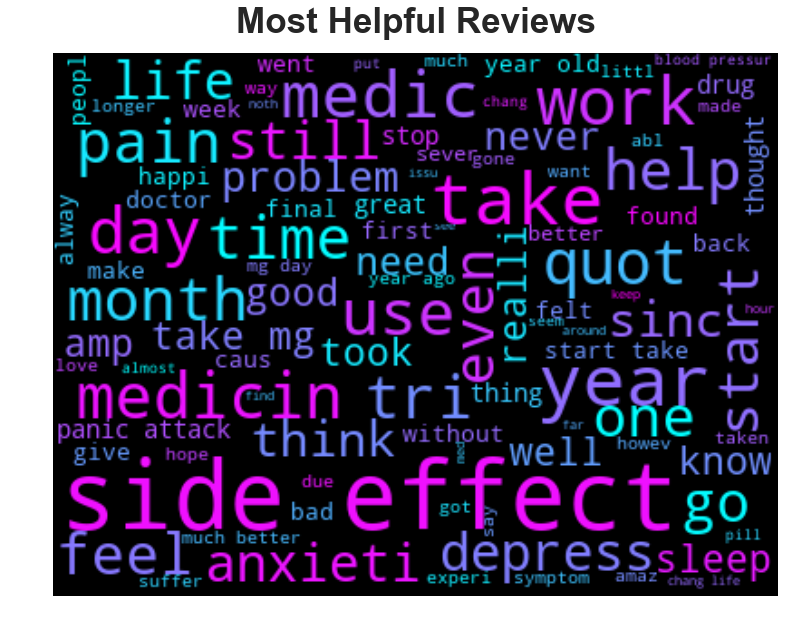

In [84]:
# Printing wordclouds for the 'most helpful' reviews

#bc_stopwords = common_words(neg_bc_reviews, pos_bc_reviews)

#stopwords = set(STOPWORDS)
#stopwords.update(stop_words)

# Create and generate a word cloud image:

wordcloud = WordCloud(max_words=100, background_color="black", colormap="cool",
                     width = 400, height = 300).generate(most_useful_clean_reviews)


# Display the generated image:

plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Helpful Reviews", fontsize = 35, weight = 'bold', pad = 20)

plt.show()

The word cloud for the most helpful reviews, reviews with 100 or more 'helpfulness' votes, hints toward certain topics that potential users like to see addressed before they decide on taking a particular medication. Words commonly observed such as 'side effect', inform the reader of certain undesirable consequences of taking the drug. Words used as measures of time such as 'year', 'month', 'time', and 'day' may be used to convey how long a reviewer has been using a drug giving readers an idea of how long they should expect to wait before seeing results as well as the frequency at which they may need to consume the drug. Finally, 'work' and 'help' hint towards a discussion of how well the medication works for the users.  

In [86]:
pd.options.display.max_colwidth = 10000

data.sort_values(['usefulCount'], ascending = False).drop_duplicates(['review']).head(5)

drugName      condition  \
6716        Sertraline     Depression   
21708   Levonorgestrel  Birth Control   
146145          Zoloft     Depression   
58608      Phentermine    Weight Loss   
2039        Citalopram     Depression   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      review  \
6716    "I remember reading people&#039;s opinions, online, of the drug before I took it and it scared me away from it. Then I finally decided to give it a try and it has been the best choice I have made. I have been on it for over 4 months and I feel great. I&#039;m on 100mg and I don&#039;t have any side effects. When I first started I did notice that my hands would tremble but then it subsided. So honestly, don&#039;t listen to all the negativity because what doesn&#039;t work for some works amazing for others. So go based on youself and not everyone else. It may be a blessing in diguise. The pill is not meant to make you be all happy go lucky and see &quot;butterflies and roses&quot;, its meant to help put the chemicals in your mind in balance so you can just be who you are and not overly depressed. I still get sad some times, but that is normal, that is life, and it&#039;s up to people to take control to make a change. I did so by getting on this pill."   
21708                                                                                                                                                                                                                                                                                                                                                                                                             "I have had my IUD for over a year now and I think it&#039;s the best thing ever. When I first got it put in I only bled for about a week with a little cramping. After that nothing at all. I haven&#039;t had a period for about 8months until I finally got one, and its not bad at all. It&#039;s light, no cramping, no headache, nothing. I haven&#039;t gained weight, my acne is gone, and my moods are fine. I know all women are different, but I just hear all these horror stories and I just wanted to tell my story, which is a good one. Hope it calms some of your fears."   
146145                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       "I&#039;ve been on Zoloft 50mg for over two years. I am a more relaxed and easy-going person because of Zoloft.  Prior to starting the medicine, I was anxious all the time, worried const

Upon a brief review of the top most helpful reviews, an additional element of empathy seems to come into play. Reviewers with the most helpful reviews seem to include their initial feelings with a certain condition or drug that they had before consumption. Consumers of medication seem to look for accounts of others that have had similar experiences and have been through similar circumstances. The aknowledgement of feelings such as worry, fear, and apprehension increase the strength with which readers identify with the reviewer which may cause them to believe that they will have a similar experience with the drug in question.

## Conclusions

Several insights have been gained from this analysis. First, it was determined, by the analyst, that if a certain drug type did not recieve twice as many positive reviews as negative reviews, then there may be room for improvement of the medication in question. We've determined that, based on the particular sample of reviews analyzed, a majority of the reviews are positive and from the beginning of 2015 to the end of 2017, the types of medications that recieved less than twice as many positive reviews as negative include those intended to treat birth control, insomnia, ADHD, pain, and depression. Birth control medication, in particular, actually recieved, about 11% more negative reviews than positive reviews within the 3 year time frame. 

Next, the brand names of the 5 most reviewed medication types, birth control, depression, pain, anxiety, and acne, were analyzed. [Table 3.1.1](#Table-3.1.1) provides a summary of the letters most commonly used at the beginning of such names for each of the conditions treated by the drugs. Analysis of the number of words in brand name medications showed that a majority of the names are composed of a single word while an analysis of their syllables showed that a majority of brand names are composed of 3 syllables.

Finally, the reviews themselves were analyzed. The reviews of the 5 most reviewed drug types, mentioned earlier, were seperated into negative and positive reviews, the 100 most common words, to both sets, were removed, and word clouds created. It was observed that the worst experiences with birth control drugs were accompanied by cramps, depression, and weight gain. Users of depression medication, at the worst of times, experience insomnia, headaches, nausea, and worsening of their depression. Negative reviews of pain medications often reference nausea, diziness, and withdrawls as their biggest complaints. Side effects of anxiety medication include worsening of anxiety, withdrawls, headaches, dizziness, and insomnia. Finally, acne medications seem to negatively impact women with relation to their reproductive cycles and use of the medications, at times, resulted in burning sensations. The most helpful reviews were also analyzed which revealed that potential drug consumers sought comfort in reviews which empathized with their conditions  as well as fears and doubts regarding the consumption of an unfamiliar medication. Readers also want to know how long they should expect to use the drug before seeing results as well as what side efects they should expect when they begin using the drug.

It is the recommendation of the analyst that companies focus on improving medications that treat birth control, depresssion, pain, anxiety, or acne. When deciding on a brand name, the marketing team may want to consider using a single, 3 syllable word beginning with any one of the letters in Table 3.1.1. During drug discovery, scientists may take into consideration the common side effects felt by consumers of particular medications as determined by the word clouds. This could narrow the search for a particular active chemical/agent that not only treats a particular condition but also one that does not trigger specific side effects. Finally, drug marketers may also want to actively address the concerns of the consumer by including more empathy in their ad campaigns and packaging labels, preemptivley addressing the questions a potential consumer might have and conveying a, seemingly, more personalized understanding of the consumer's condition and circumstances. 